In [2]:
import pandas as pd
import numpy as np
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, StratifiedKFold,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from statsmodels.graphics.mosaicplot import mosaic
from mpl_toolkits.mplot3d import Axes3D

In [3]:
path = kagglehub.dataset_download("hesh97/titanicdataset-traincsv")

print("Path to dataset files:", path)
print("Path to dataset files:", path)
csv_file = None
for file in os.listdir(path):
    if file.endswith('.csv'):
        csv_file = os.path.join(path, file)
        break

if csv_file is None:
    print("No CSV file found in the directory.")
else:
    print(f"Found CSV file: {csv_file}")


Path to dataset files: C:\Users\keert\.cache\kagglehub\datasets\hesh97\titanicdataset-traincsv\versions\1
Path to dataset files: C:\Users\keert\.cache\kagglehub\datasets\hesh97\titanicdataset-traincsv\versions\1
Found CSV file: C:\Users\keert\.cache\kagglehub\datasets\hesh97\titanicdataset-traincsv\versions\1\train.csv


In [4]:
df = pd.read_csv(csv_file, delimiter=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<h2>Violin Plot for Age Distribution by Survival and Class</h2>
<p>Violin plots show the distribution of passenger ages across different classes and survival outcomes.</p>

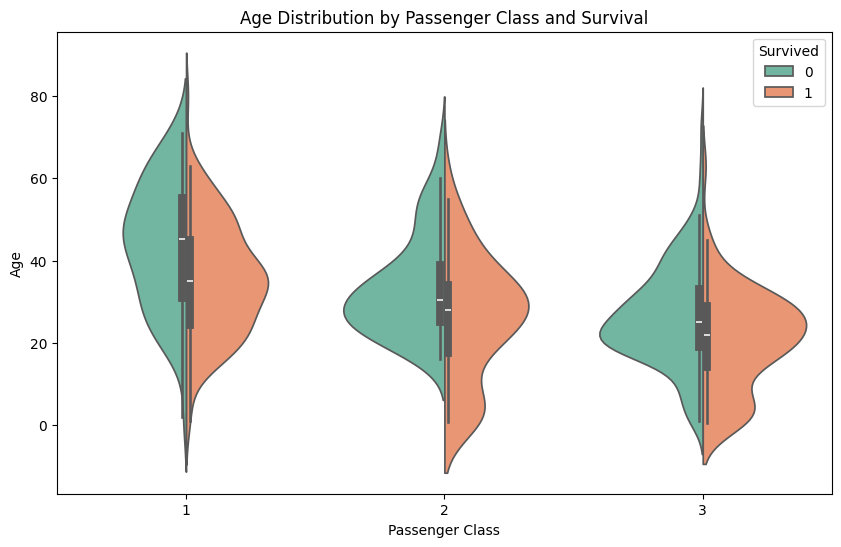

In [7]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, split=True, palette="Set2")
plt.title("Age Distribution by Passenger Class and Survival")
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.legend(title="Survived", loc="upper right")
plt.show()


<h2>Pair Plot for Numeric Variables Grouped by Survival</h2>
<p>A pair plot shows pairwise relationships across multiple variables, useful for detecting patterns and correlations.</p>

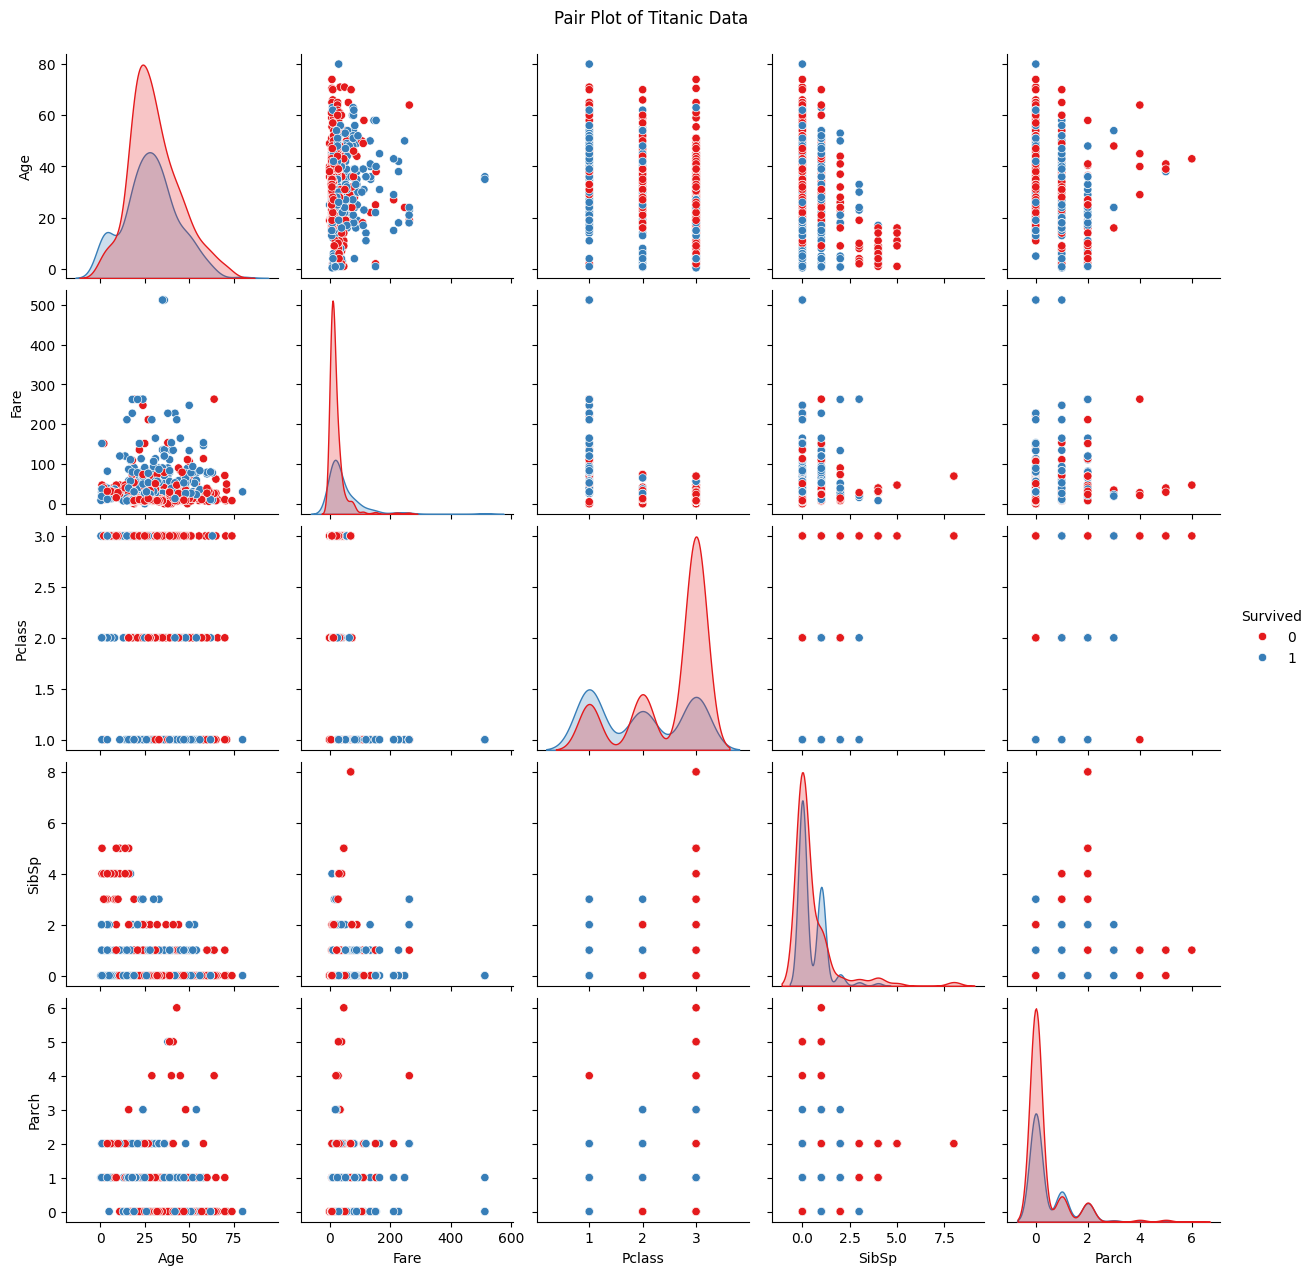

In [8]:
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Survived']], hue="Survived", palette="Set1", diag_kind="kde")
plt.suptitle("Pair Plot of Titanic Data", y=1.02)
plt.show()


<h2>Facet Grid for Fare Distribution Across Passenger Classes and Survival</h2>
<p>A FacetGrid enables analysis of the Fare variable across multiple categories, such as Passenger Class and Survival status.</p>

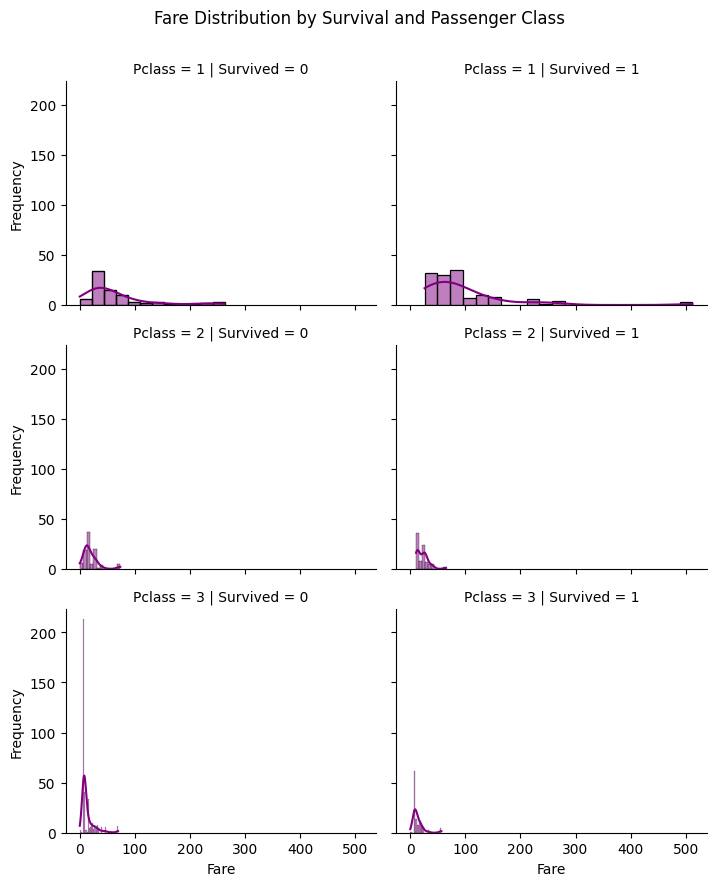

In [9]:
g = sns.FacetGrid(df, col="Survived", row="Pclass", height=3, aspect=1.2)
g.map(sns.histplot, "Fare", kde=True, color="purple")
g.set_axis_labels("Fare", "Frequency")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Fare Distribution by Survival and Passenger Class")
plt.show()


<h2>Mosaic Plot of Survival by Sex and Class</h2>
<p>Mosaic plots are particularly useful for visualizing counts across multiple categorical variables.<br>
Each rectangle or tile in a mosaic plot represents a unique combination of categories.<br>
The size (area) of each rectangle represents the proportion of data points within that combination of categories.<br>
Red represents non-survivors (No).<br>
Green represents survivors (Yes).</p>

<Figure size 1200x800 with 0 Axes>

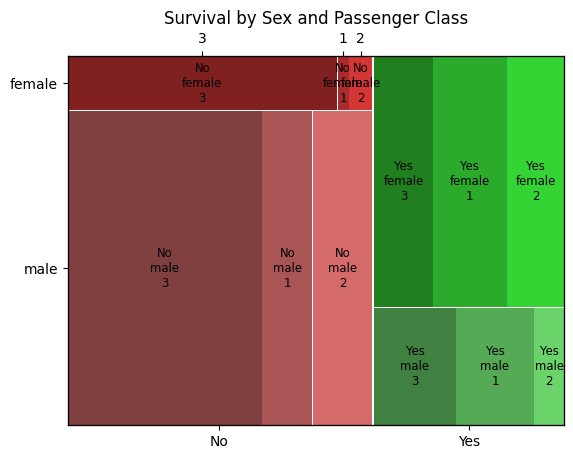

In [28]:
# Prepare data for mosaic plot
mosaic_data = df[['Survived', 'Sex', 'Pclass']].dropna()
mosaic_data['Survived'] = mosaic_data['Survived'].replace({0: 'No', 1: 'Yes'})

plt.figure(figsize=(12, 8))
mosaic(mosaic_data, ['Survived', 'Sex', 'Pclass'])
plt.title("Survival by Sex and Passenger Class")
plt.show()


In [24]:
print(f"Sex=female, Pclass=1, Survived=1 : {len(df[(df['Sex'] == 'female') & (df['Pclass'] == 1) & (df['Survived'] == 1)])}")
print(f"Sex=female, Pclass=1, Survived=0 : {len(df[(df['Sex'] == 'female') & (df['Pclass'] == 1) & (df['Survived'] == 0)])}")

print(f"Sex=female, Pclass=2, Survived=1 : {len(df[(df['Sex'] == 'female') & (df['Pclass'] == 2) & (df['Survived'] == 1)])}")
print(f"Sex=female, Pclass=2, Survived=0 : {len(df[(df['Sex'] == 'female') & (df['Pclass'] == 2) & (df['Survived'] == 0)])}")

print(f"Sex=female, Pclass=3, Survived=1 : {len(df[(df['Sex'] == 'female') & (df['Pclass'] == 3) & (df['Survived'] == 1)])}")
print(f"Sex=female, Pclass=3, Survived=0 : {len(df[(df['Sex'] == 'female') & (df['Pclass'] == 3) & (df['Survived'] == 0)])}")

print(f"Sex=male, Pclass=1, Survived=1 : {len(df[(df['Sex'] == 'male') & (df['Pclass'] == 1) & (df['Survived'] == 1)])}")
print(f"Sex=male, Pclass=1, Survived=0 : {len(df[(df['Sex'] == 'male') & (df['Pclass'] == 1) & (df['Survived'] == 0)])}")

print(f"Sex=male, Pclass=2, Survived=1 : {len(df[(df['Sex'] == 'male') & (df['Pclass'] == 2) & (df['Survived'] == 1)])}")
print(f"Sex=male, Pclass=2, Survived=0 : {len(df[(df['Sex'] == 'male') & (df['Pclass'] == 2) & (df['Survived'] == 0)])}")

print(f"Sex=male, Pclass=3, Survived=1 : {len(df[(df['Sex'] == 'male') & (df['Pclass'] == 3) & (df['Survived'] == 1)])}")
print(f"Sex=male, Pclass=3, Survived=0 : {len(df[(df['Sex'] == 'male') & (df['Pclass'] == 3) & (df['Survived'] == 0)])}")


Sex=female, Pclass=1, Survived=1 : 91
Sex=female, Pclass=1, Survived=0 : 3
Sex=female, Pclass=2, Survived=1 : 70
Sex=female, Pclass=2, Survived=0 : 6
Sex=female, Pclass=3, Survived=1 : 72
Sex=female, Pclass=3, Survived=0 : 72
Sex=male, Pclass=1, Survived=1 : 45
Sex=male, Pclass=1, Survived=0 : 77
Sex=male, Pclass=2, Survived=1 : 17
Sex=male, Pclass=2, Survived=0 : 91
Sex=male, Pclass=3, Survived=1 : 47
Sex=male, Pclass=3, Survived=0 : 300


<Figure size 2000x1500 with 0 Axes>

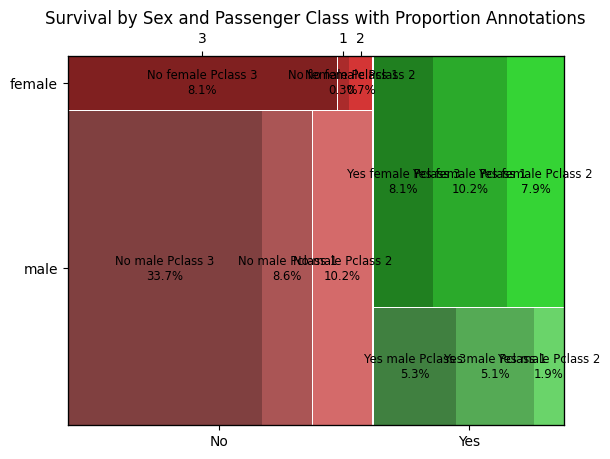

In [33]:
# Prepare data for mosaic plot
mosaic_data = df[['Survived', 'Sex', 'Pclass']].dropna()
mosaic_data['Survived'] = mosaic_data['Survived'].replace({0: 'No', 1: 'Yes'})

# Create a labelizer function to add proportions
def labelizer(key):
    # Filter data based on current cell key and calculate proportion
    cell_data = mosaic_data[(mosaic_data['Survived'] == key[0]) & 
                            (mosaic_data['Sex'] == key[1]) & 
                            (mosaic_data['Pclass'] == int(key[2]))]
    proportion = len(cell_data) / len(mosaic_data) * 100  # Calculate percentage
    return f"{key[0]} {key[1]} Pclass {key[2]}\n{proportion:.1f}%"

plt.figure(figsize=(20, 15))
mosaic(mosaic_data, ['Survived', 'Sex', 'Pclass'], labelizer=labelizer)
plt.title("Survival by Sex and Passenger Class with Proportion Annotations")
plt.show()


<h2>Swarm Plot for Fare by Class and Survival Status</h2><p>
Swarm plots show individual data points, which is great for seeing clustering or dispersion within fare by class and survival.</p>

C:\Users\keert\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 28.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\keert\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 65.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\keert\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\keert\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 42.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg

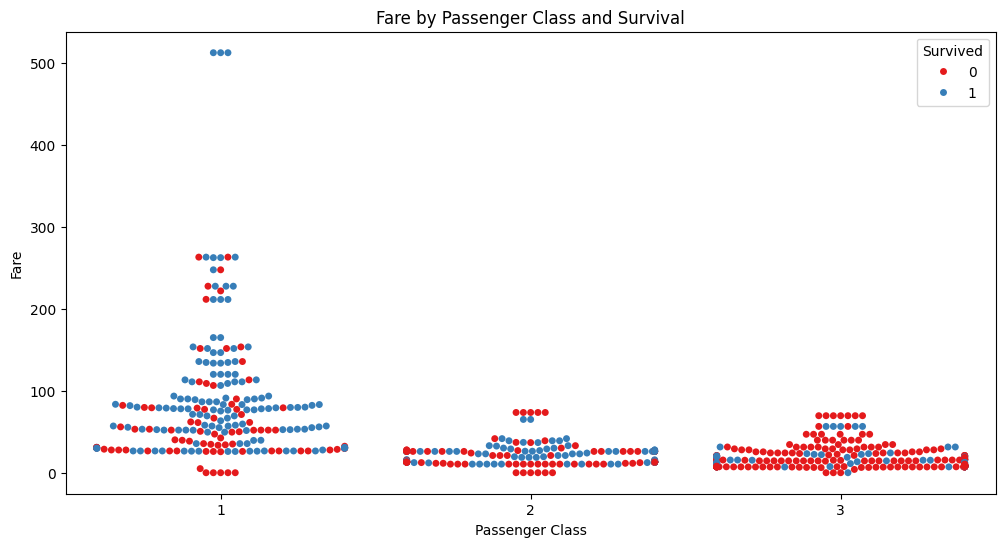

In [12]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x="Pclass", y="Fare", hue="Survived", data=df, palette="Set1")
plt.title("Fare by Passenger Class and Survival")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.legend(title="Survived")
plt.show()


<h2>3D Scatter Plot of Age, Fare, and Class with Survival as Color</h2>
<p>A 3D scatter plot can reveal relationships between multiple features, like Age, Fare, and Class.</p>

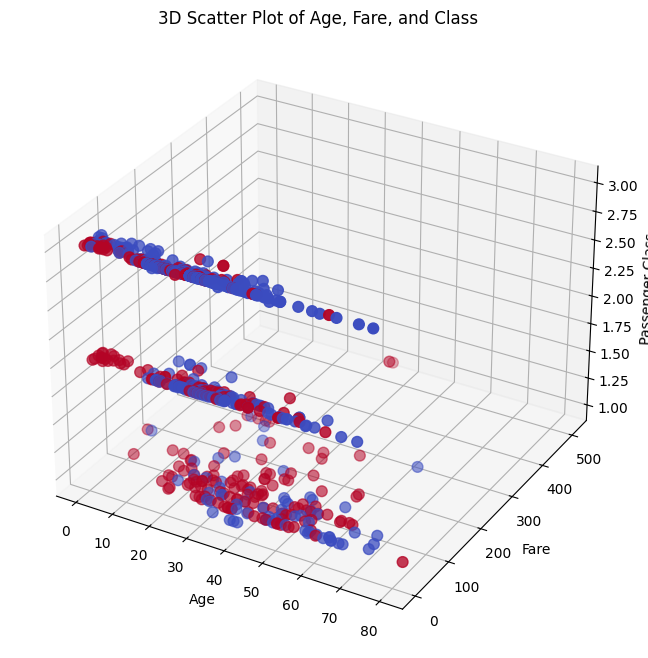

In [13]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Fare'], df['Pclass'], c=df['Survived'], cmap="coolwarm", s=60)

ax.set_xlabel("Age")
ax.set_ylabel("Fare")
ax.set_zlabel("Passenger Class")
plt.title("3D Scatter Plot of Age, Fare, and Class")
plt.show()


In [ ]:
df['Cabin'].value_counts()

In [ ]:
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

In [ ]:
median_age = df['Fare'].median()
df['Fare'].fillna(median_age, inplace=True)

In [ ]:
# Find the mode of the 'Embarked' column
mode_embarked = df['Embarked'].mode()[0]

# Replace null values in 'Embarked' with the mode
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

In [ ]:
df['Cabin'].fillna('Unknown', inplace=True)

In [ ]:
df.info()

In [ ]:
plt.figure(figsize=(10, 6))
# Show the plot
plt.show()
sns.countplot(x='Sex', hue='Survived', data=df,  palette='pastel')

plt.title('Count of Survived/Non Survived Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Survived/Non Survived')

plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout
plt.show()

In [ ]:
women = df.loc[df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

men = df.loc[df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='pastel')

# Adding titles and labels
plt.title('Survival Counts Based on Passenger Class (Pclass) with Survived Hue')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Count of Passengers')
plt.xticks(rotation=0)
plt.legend(title='Survived')

# Show the plot
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SibSp', hue='Survived',palette='pastel')

# Adding titles and labels
plt.title('Survival Counts Based on SibSp with Survived Hue')
plt.xlabel('SibSp')
plt.ylabel('Count of Passengers')
plt.xticks(rotation=0)
plt.legend(title='Survived')

# Show the plot
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Parch', hue='Survived', palette='pastel')

# Adding titles and labels
plt.title('Survival Counts Based on Parch with Survived Hue')
plt.xlabel('Parch')
plt.ylabel('Count of Passengers')
plt.xticks(rotation=0)
plt.legend(title='Survived')

# Show the plot
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Embarked', hue='Survived', palette='pastel')

# Adding titles and labels
plt.title('Survival Counts Based on Embarked with Survived Hue')
plt.xlabel('Embarked')
plt.ylabel('Count of Passengers')
plt.xticks(rotation=0)
plt.legend(title='Survived')

# Show the plot
plt.show()

In [ ]:
# Create a boxplot to analyze age distribution based on survival
plt.figure(figsize=(12, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution of Survived and Non-Survived Passengers')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['Non-Survived', 'Survived'])
plt.show()

In [ ]:
# Group the data by 'Age' and 'Survived' and count occurrences
age_survival_counts = df.groupby(['Age', 'Survived']).size().unstack(fill_value=0)
print(age_survival_counts)
# Plotting the data
plt.figure(figsize=(14, 7))

# Plot lines for 'Survived' = 1 and 'Survived' = 0
sns.lineplot(data=age_survival_counts, x=age_survival_counts.index, y=age_survival_counts[1], label='Survived')
sns.lineplot(data=age_survival_counts, x=age_survival_counts.index, y=age_survival_counts[0], label='Non-Survived')

# Adding plot details
plt.title('Age vs. Count of Survived and Non-Survived Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survival Status')
plt.show()

In [ ]:
numerical_features = df[[column for column in df.columns if df[column].dtype != 'object']]
#print(df_weather.head())
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_features.corr(), annot=True)

In [ ]:
sns.pairplot(df)

# Show the plot
plt.show()

In [ ]:
# Step 1: Define age bins and labels
age_bins = [0, 20, 40, 60, 80]
age_labels = ['0-20', '21-40', '41-60', '61-80']

# Step 2: Create a new column 'age_group' based on these bins
df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Step 3: Plot the countplot with hue based on 'Survived'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', hue='Survived',palette='pastel')

# Adding plot details
plt.title('Survival Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [ ]:
X_df=df.drop(['PassengerId','Ticket','Cabin','Survived','Name','age_group'],axis=1)
Y_df=df['Survived']

In [ ]:
X_df.info()

In [ ]:
# Perform one-hot encoding if columns are now verified to be present
X_df = pd.get_dummies(X_df, columns=['Embarked', 'Sex'], drop_first=True)
X_df = X_df.astype(int)

In [ ]:

# Step 1: Split the data into train + validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_df, Y_df, test_size=0.2, random_state=42, stratify=Y_df)
scaler = StandardScaler()
X_train_val_scaled = scaler.fit_transform(X_train_val)
X_test_scaled = scaler.transform(X_test)
# Step 2: Initialize the model
model = LogisticRegression(max_iter=1000)

k_values = [3, 5, 7, 10]
# Step 3: Apply stratified cross-validation on the train + validation set
# Using Stratified K-Fold with 5 folds
for k in k_values:
    stratified_kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    cross_val_scores = cross_val_score(model, X_train_val, y_train_val, cv=stratified_kf, scoring='accuracy')

    print("Cross-validation scores:", cross_val_scores)
    print("Mean cross-validation score:", np.mean(cross_val_scores))

# Step 4: Train on the full train + validation set and evaluate on the test set
    model.fit(X_train_val, y_train_val)
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Test set accuracy:", test_accuracy)


In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=stratified_kf, scoring='accuracy')
grid_search.fit(X_train_val_scaled, y_train_val)
best_model = grid_search.best_estimator_

# Train the best model on the full train + validation set
best_model.fit(X_train_val_scaled, y_train_val)

# Evaluate on the test set
y_test_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test set accuracy after tuning:", test_accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report for precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_df, Y_df, test_size=0.2, random_state=42, stratify=Y_df)
scaler = StandardScaler()
X_train_val_scaled = scaler.fit_transform(X_train_val)
X_test_scaled = scaler.transform(X_test)
pca = PCA(n_components=2)   
  # Reduce to 2 principal components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)